In [1]:
import pandas as pd
from pandas import Series
def customDescribe(x):
    data1 = [x.mean(), x.std(), x.min(), x.quantile(0.25), x.median(), 
            x.quantile(0.75), x.max(), x.skew(), x.kurtosis(), x.mode().max(), x.isnull().sum()]
    names = ['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis', 'mode', 'NAs']
    return Series(data, index=names)



df = pd.read_csv('responses.csv')
x = df.loc[:, 'Dance':'Opera'].join(df['Gender']).groupby('Gender')
x = x.mean()
x.iloc[1]



Dance                3.048900
Folk                 2.230392
Country              2.221130
Classical music      2.960688
Musical              2.321951
Pop                  3.245098
Rock                 3.775061
Metal or Hardrock    2.639024
Punk                 2.544335
Hiphop, Rap          3.080488
Reggae, Ska          2.776961
Swing, Jazz          2.702439
Rock n roll          3.128954
Alternative          2.821951
Latino               2.384236
Techno, Trance       2.601966
Opera                2.092457
Name: male, dtype: float64

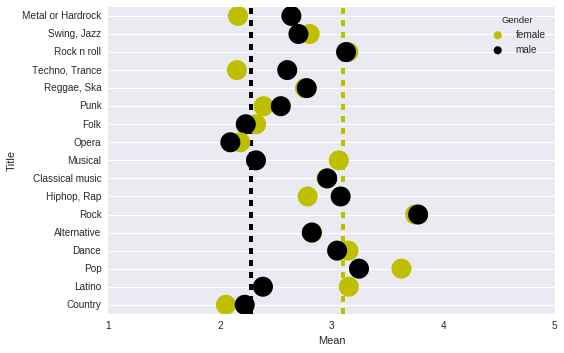

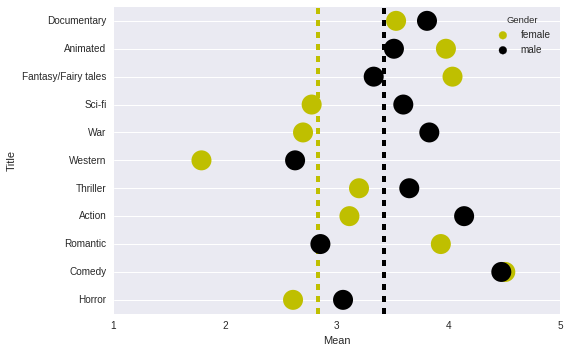

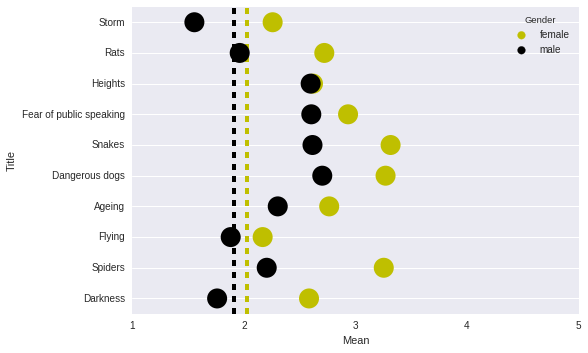

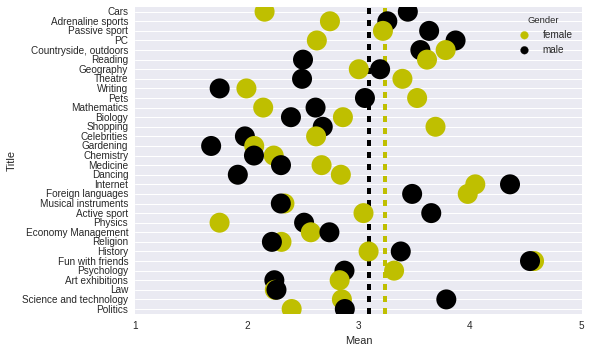

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

def analyze_group_differences (df, group, begin, end, plt_title):
    groups = df.loc[:,begin:end].join(df[group]).groupby(group).mean()
    x= [i for i in  groups.iterrows()]
    res = []
    for i,s in x:
        for k,v in s.to_dict().items():
            res.append((i, k, v))
    new_df = pd.DataFrame(data = res, columns = [ 'Gender', 'Title', 'Mean'])
    fig = plt.figure()
    ax = fig.gca()
    sns.stripplot(data=new_df, x = 'Mean', y = 'Title', hue= 'Gender', orient='h', palette = {'male':'k', 
                                                                                           'female':'y'},
                 size = 20, ax = ax);
    plt.axvline(x=np.mean(groups.mean().iloc[0]), color='y', lw=4, ls='dashed')
    plt.axvline(x=np.mean(groups.mean().iloc[1]), color='k', lw=4, ls='dashed')
    ax.set_xticks([1,2,3,4,5])
  
   
    plt.grid()
    plt.show()
    
analyze_group_differences(df=df, group ='Gender', begin = 'Dance', end = 'Opera', plt_title = 'Музыкальные вкусы')
analyze_group_differences(df=df, group ='Gender', begin = 'Horror', end = 'Action', plt_title = 'Фильмы')
analyze_group_differences(df=df, group ='Gender', begin = 'Flying', end = 'Fear of public speaking', plt_title = 'Страхи')
analyze_group_differences(df=df, group ='Gender', begin = 'History', end = 'Pets', plt_title = 'Хобби')